### Import Libraries

In [1]:
import numpy  as np
import pandas as pd
import scipy.stats as stats
from   scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import matthews_corrcoef, confusion_matrix, accuracy_score, roc_auc_score, classification_report

## 1. Load the dataset

In [2]:
# Read and import to dataframe

df = pd.read_csv('parkinsons.data')
df.head(6).transpose()

,0,1,2,3,4,5
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5,phon_R01_S01_6
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014,120.552
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781,131.162
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655,113.787
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284,0.00968
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011,8e-05
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655,0.00463
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908,0.0075
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966,0.01388
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701


## 2. Check out the structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [3]:
# Describing the data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [4]:
# Doing an info on the data to check out attribute types and total for each

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
# Check number of missing values each column 

df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## We can observe the following :

###  1. There are no null values. Each attribute/column has 195 values.

###  2. All the attributes are of numeric data type except the name column which will be dropped eventually before starting the model building as it wont have any contribution in deciding whether a patient has the disease or not.

###  3. The attributes vary in their scales and needs to be normalized before running a decision tree or Random Forest.

In [6]:
# Dropping name column
df.drop(labels=['name'], inplace=True, axis=1)

## 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

### Box Plot

In [7]:
#Uni-variate analysis
# Lets start with boxplot. As the first 3 attributes related to fundamental vocal frequency are in similar scale and the rest of them in a similar scale, lets plot 2 different box plot

# Box Plot 1 with 
# MDVP:Fo(Hz) - Average vocal fundamental frequency
# MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
# MDVP:Flo(Hz) - Minimum vocal fundamental frequency

# Box Plot 2 with the rest
all_columns = df.columns.tolist()
freq_cols = all_columns[0:3]
rest_cols = all_columns
for col in freq_cols:
    rest_cols.remove(col)

# Scaling the dataset    
df_scaled = df.apply(zscore)   

C:\Users\swainr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


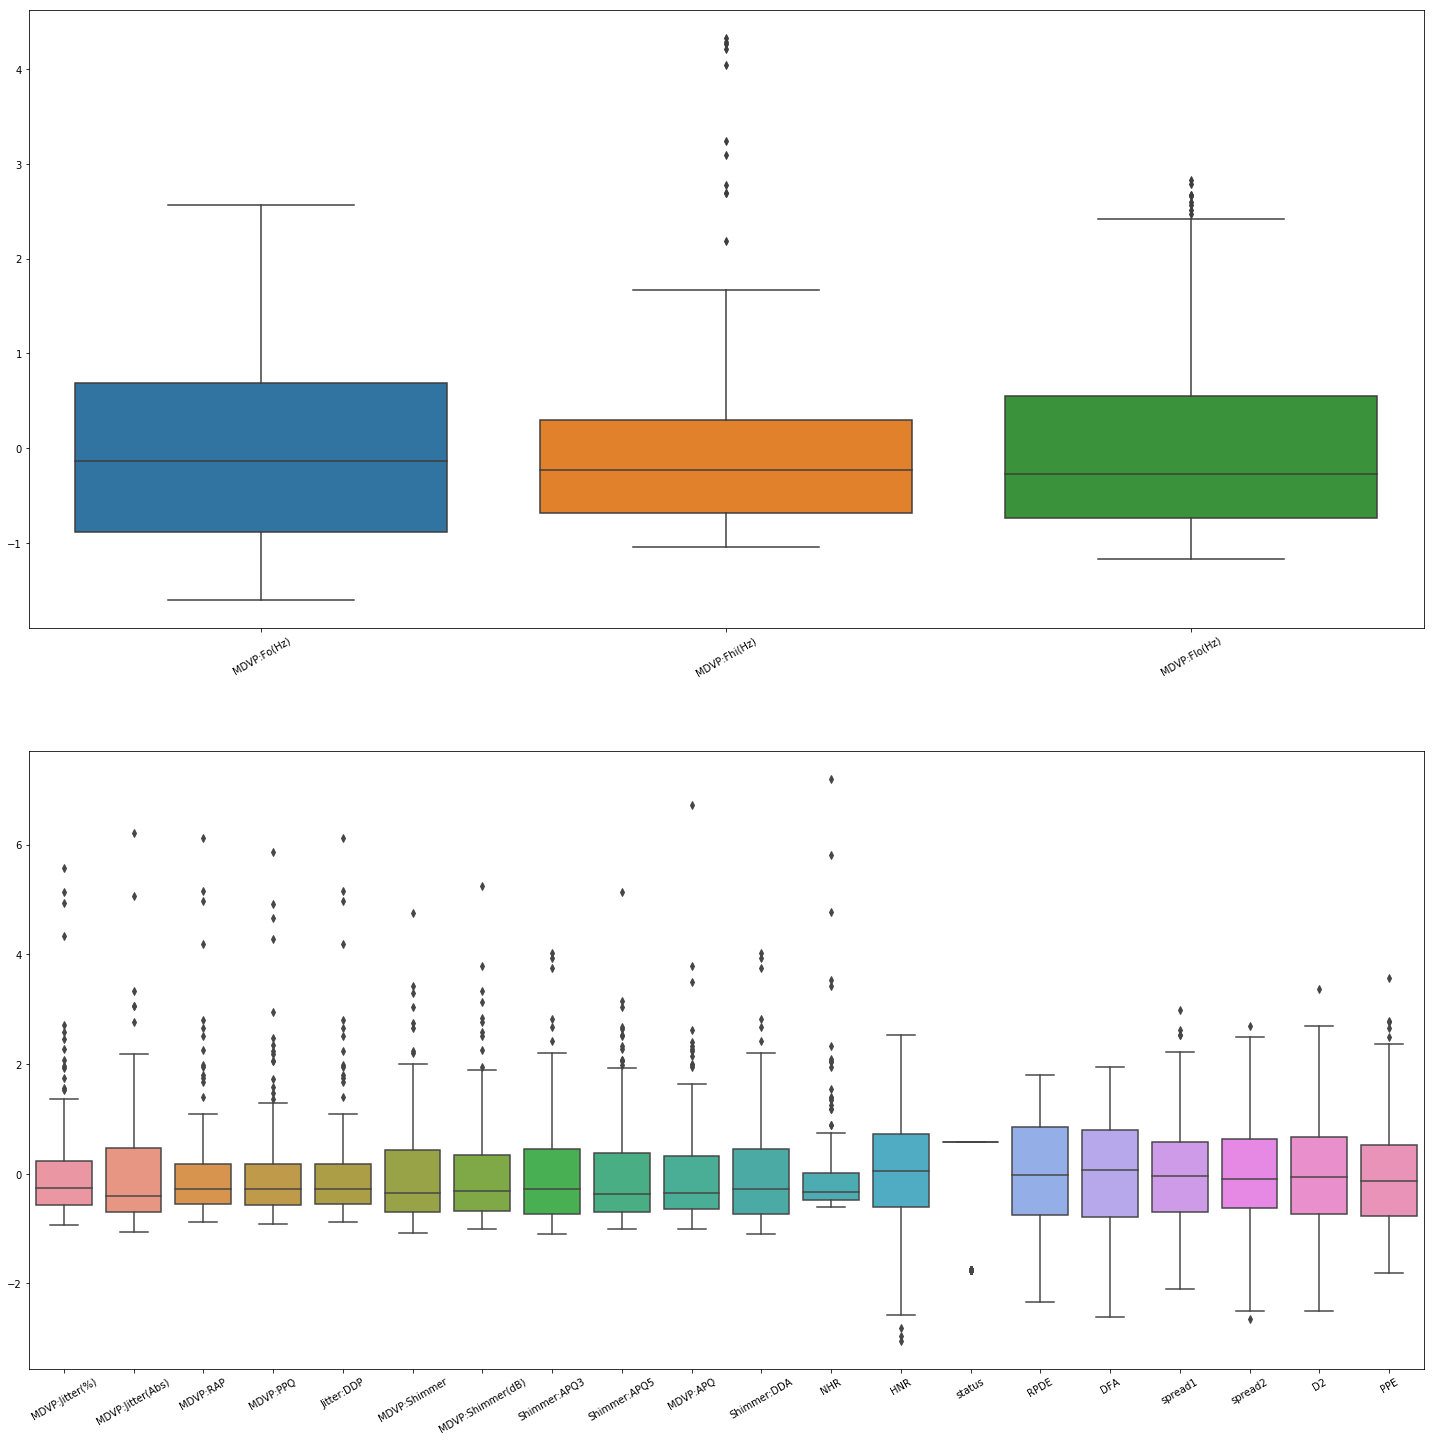

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(25,25))

#df.boxplot(freq_cols, ax=axes.flatten()[0], fontsize=20)
#df.boxplot(rest_cols, rot = 90, ax=axes.flatten()[1], fontsize=20)
ax1 = sns.boxplot(data=df_scaled[freq_cols],ax=axes.flatten()[0])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax2 = sns.boxplot(data=df_scaled[rest_cols],ax=axes.flatten()[1])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
fig.show() 

### There are quite some outliers here from feature 'MVDP: Jitter(%)' till 'NHR', but I think decision tree and random forest should be able to handle them.

### Density Plots

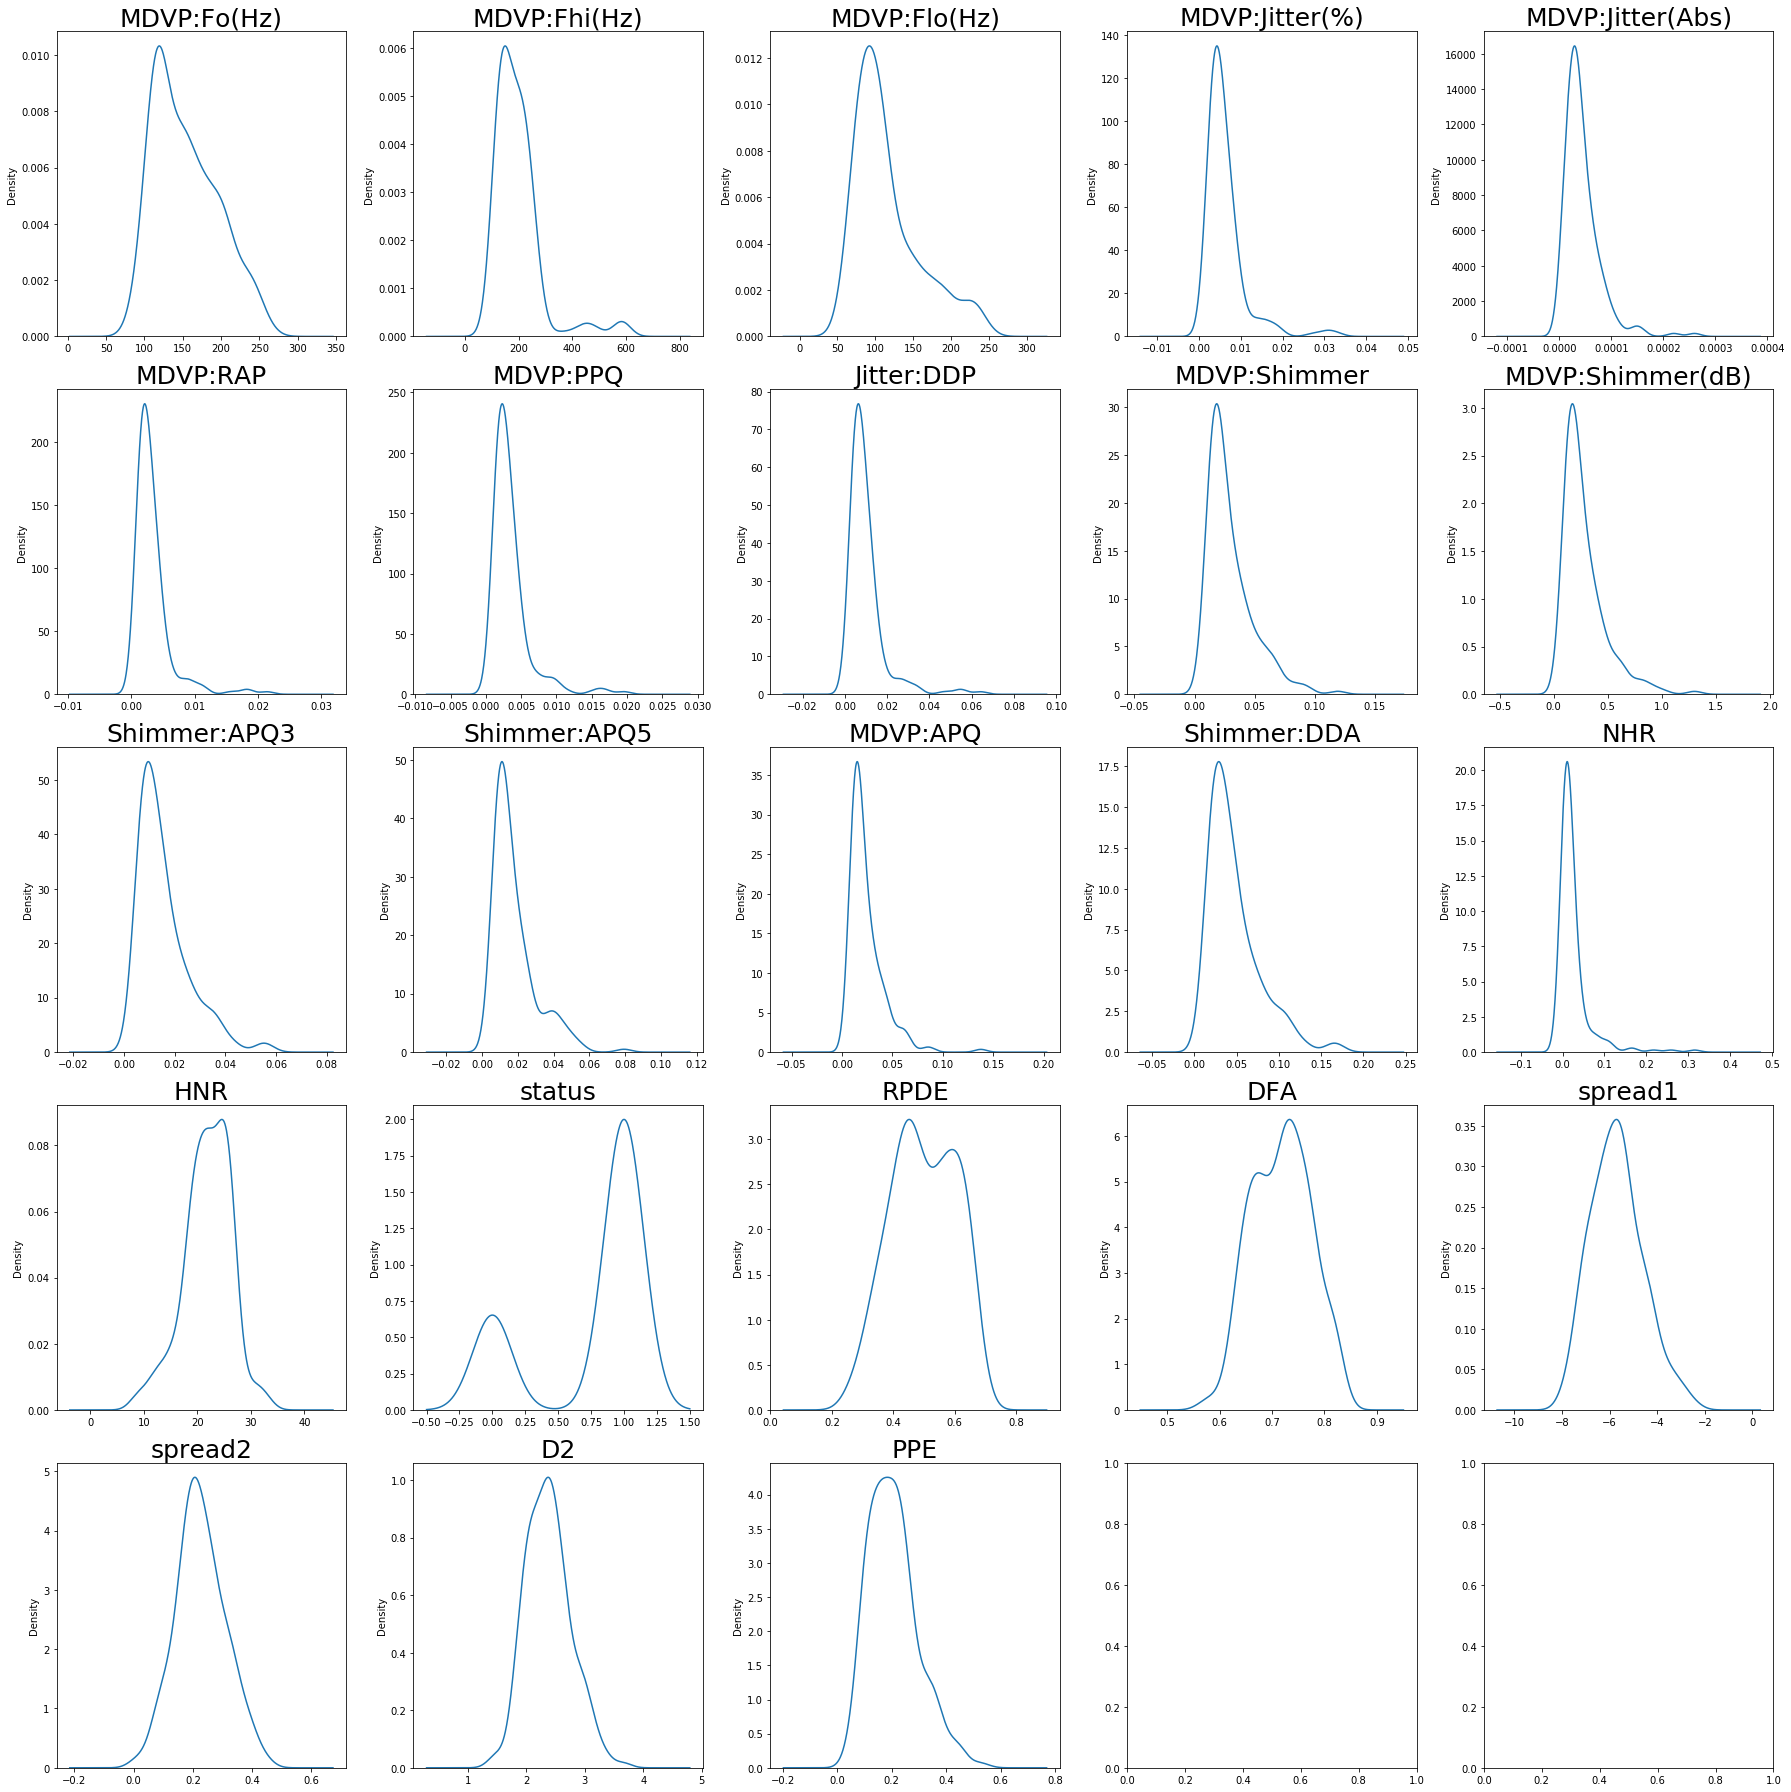

In [9]:
#Uni-variate analysis

k = len(df.columns)
n = 5
m = 5

fig, axes = plt.subplots(m, n, figsize=(25,25))
for i, (name, col_data) in enumerate(df.iteritems()):
    r, c = i // n, i % n
    ax  = axes[r, c]
    ax2 = col_data.plot.kde(ax=ax)
    ax2.set_ylim(0)
    ax2.set_title(name, fontsize=25)
#plt.rcParams.update({'font.size': 22})
fig.tight_layout()


### 1. We can see that the features in the first 3 rows of plot are right-skewed and have their central value (median) toward the right. Also, they are Unimodal.
### 2. The first four plots in the 4th row are bi-modal. 
### 3. Features spread1  (last in 4th row), spread2, D2 and PPE (last row) have a close to normal - distribution though not normal and so central value is around the centre.


### Pair Plot

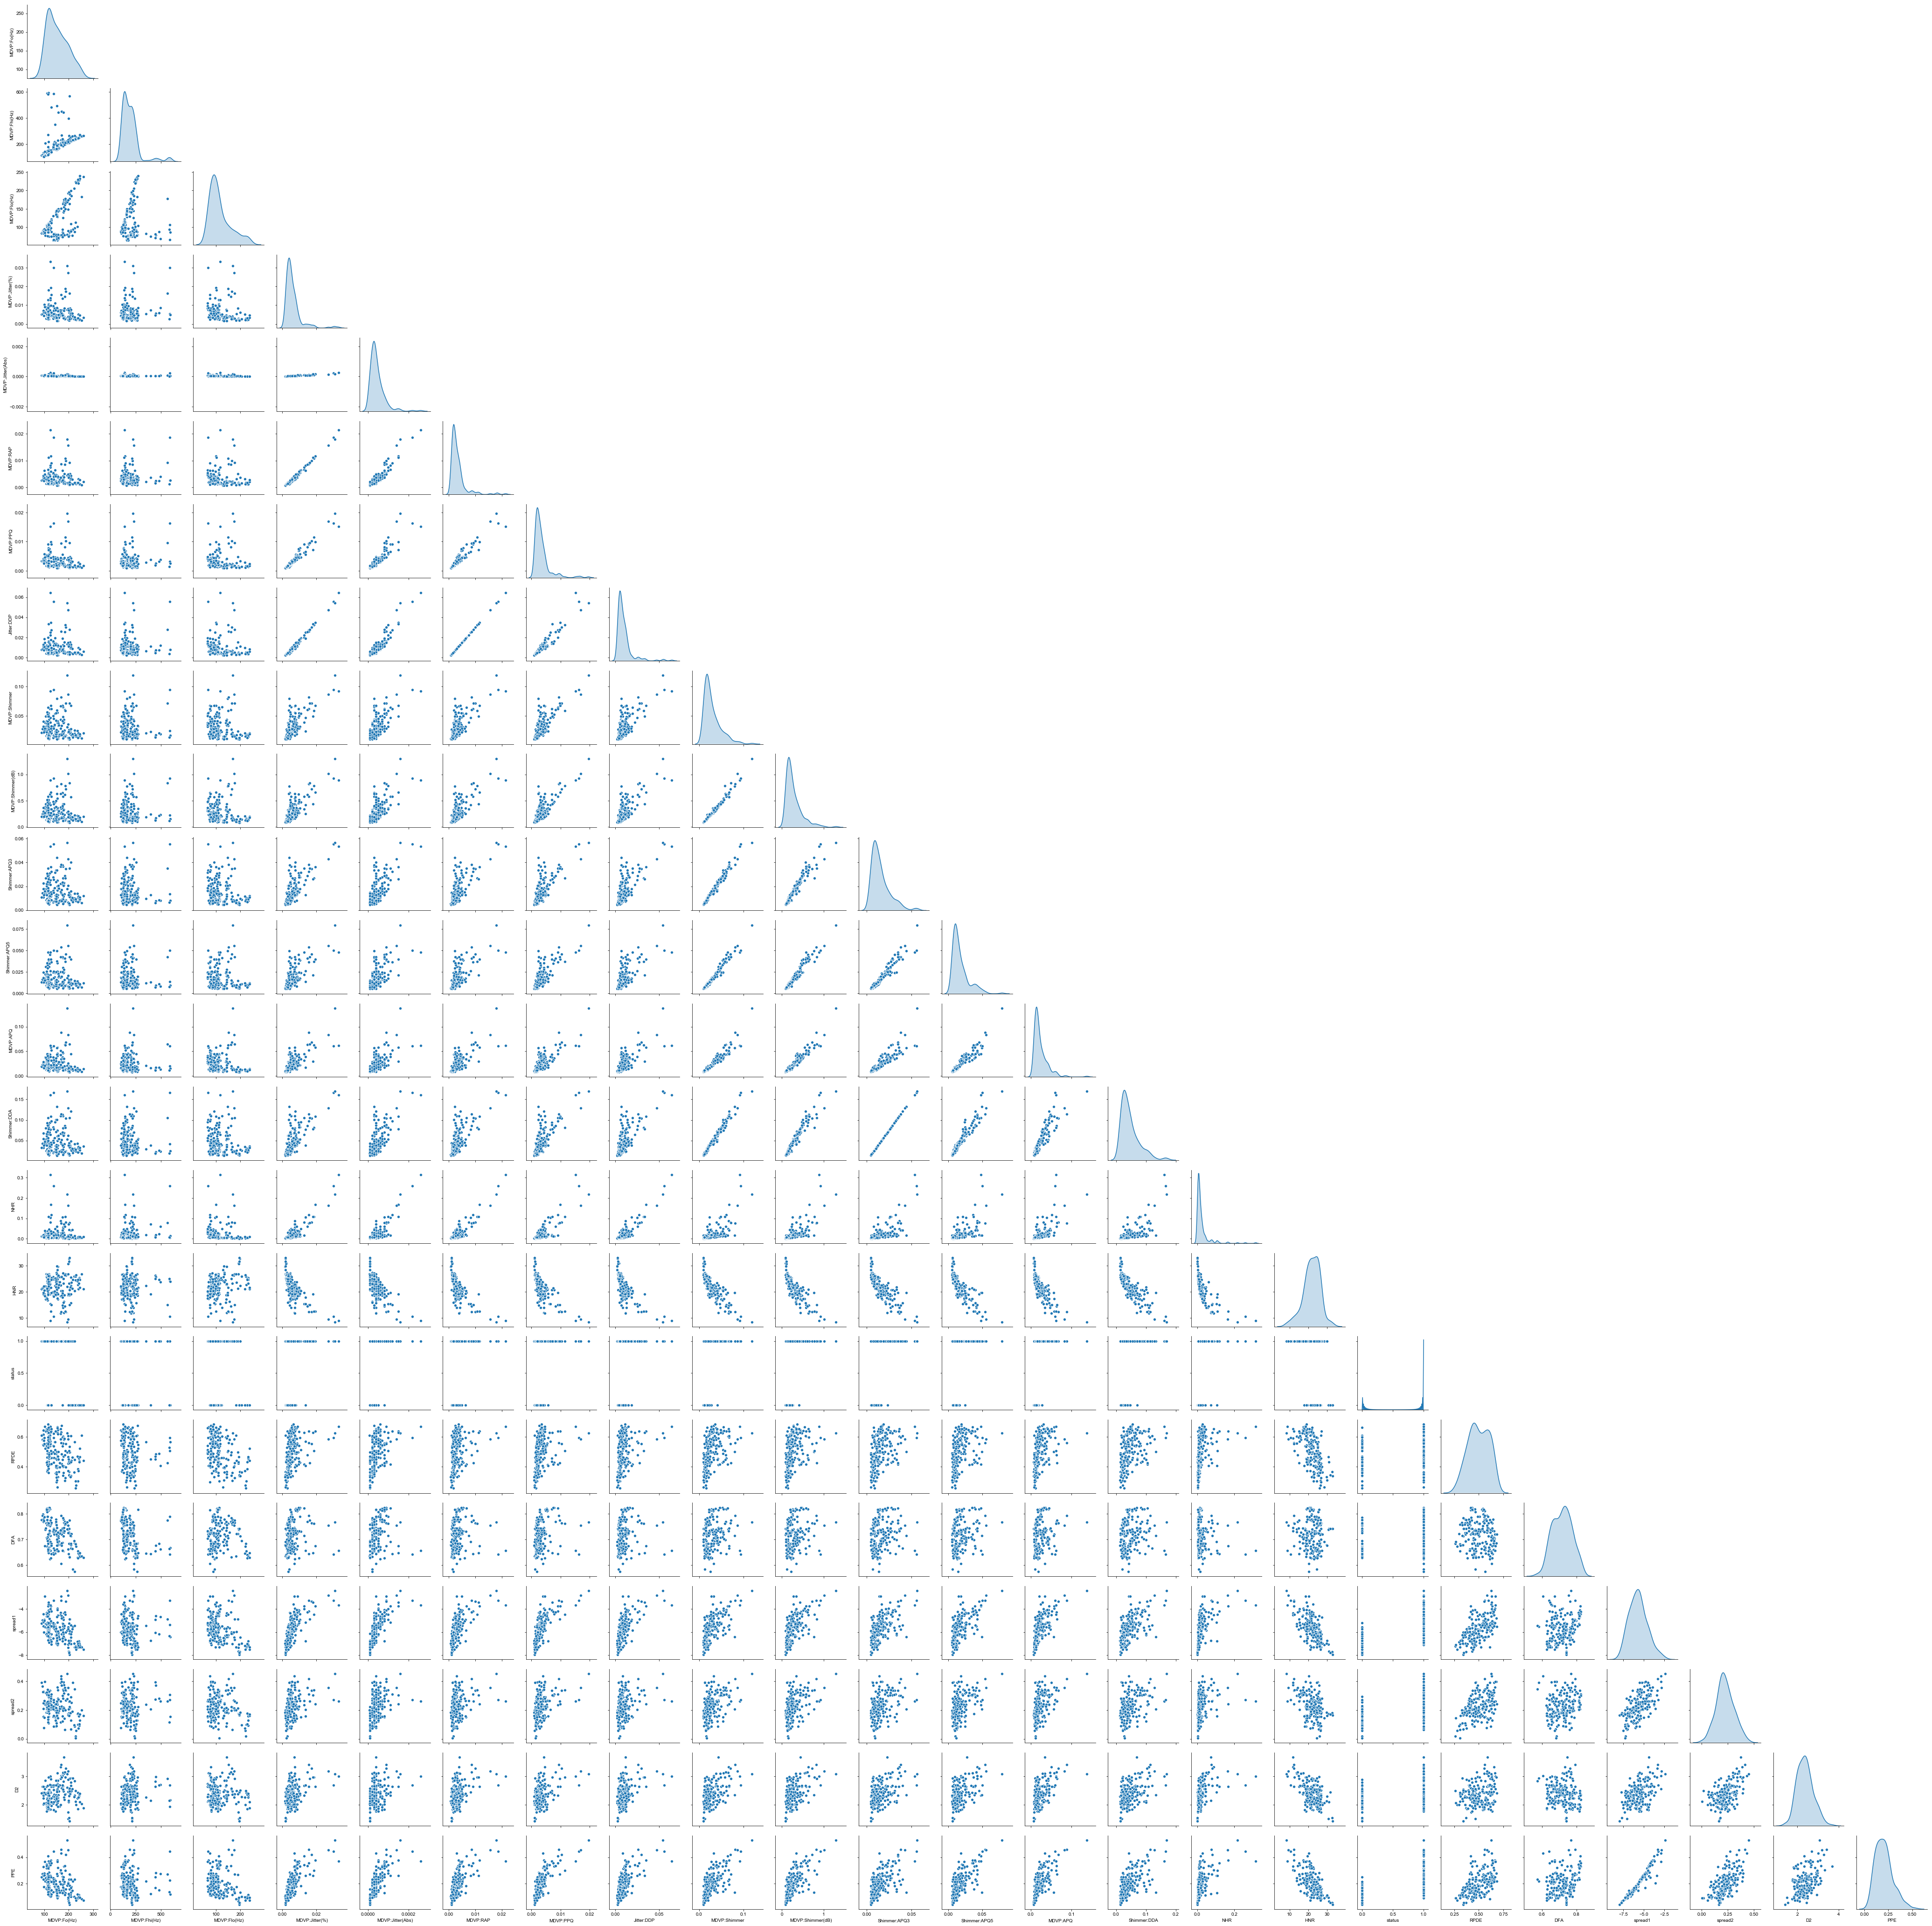

In [10]:
# Bi-variate analysis

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.pairplot(df, diag_kind='kde')
g.map_upper(hide_current_axis)
sns.set(font_scale=1.5)

### We can see a lot of variables having strong positive correlation with each other around the central and top-left area near the diagonal of this huge pair plot. Lets explore the magnitude using heatmap

### Heat Map

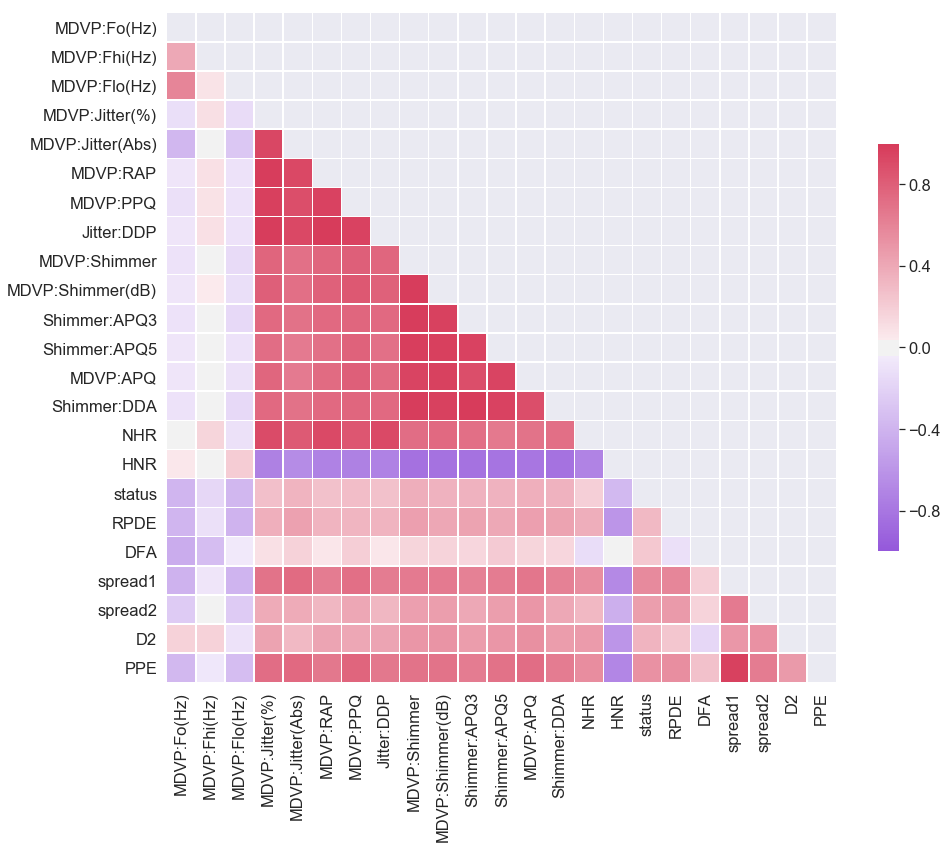

In [11]:
# Do a heatmap for the lower triangle as both upper and lower triangles are symmtrical

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 1. Features like ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'] are highly positively correlated with each other. The description of these features mentions they all measure variation of fundamental frequency and I guess that why they are correlated.

### 2. Features ['MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA']  are highly positively correlated with each other. Similar these features measure variation in amplitude and hence, correlated.

### 3. Feature NHR is positively correlated with Features ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']. As NHR measures ratio of noise to tonal components in the voice, and as these features measure variation of fundamental frequency, I guess NHR must be positively related to frequency part.

### 4. Feature HNR is highly negatively correlated with a lot of features ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR']. As seen above, this proves that HNR must be negatively related to frequency and amplitude part.

### 5. HNR is also negatively correlated to features ['RPDE', 'spread1', 'spread2', 'D2', 'PPE'] where spread1, spread2 and PPE are again some non-linear mesaures of fundamental frequency variation.

### 6. Feature PPE is highly correlated with spread1.


## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [12]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
X = df.drop(labels=['status'], axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)
list(map(lambda x: x.shape, [X_train, X_test, y_train, y_test]))

[(136, 22), (59, 22), (136,), (59,)]

## 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [14]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=42 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [15]:
print('Train Score : %0.3f' %dt_model.score(X_train , y_train) )  
print('Test Score : %0.3f' %dt_model.score(X_test , y_test) )     # performance on test data

Train Score : 1.000
Test Score : 0.898


In [16]:
predicted_y_test = dt_model.predict(X_test)

In [17]:
pd.crosstab(predicted_y_test, y_test, margins=True, margins_name="Total", rownames=['Predicted Status'], colnames=['Actual Status'])

Actual Status,0,1,Total
Predicted Status,,,
0,11,2,13
1,4,42,46
Total,15,44,59


### We can see the decision tree has totally overfitted the training data even though it has a decent performance on the test data. Hence, we need to introduce regularization parameters.

## 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [18]:
# Using GridSearch CV to get the best set of parameters using regularization

parameters= {'max_depth' : [3,5,7,9,11,13,15,17], 'min_samples_split' : [5,10,15,20,25,30,35,40], 'min_samples_leaf' : [3,5,7,9,11,13,15] }

dt_grid_search = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy',random_state=42 ), parameters, cv = 5)
dt_grid_search.fit(X_train,y_train)

C:\Users\swainr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17], 'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40], 'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
    print('Best score: %0.3f' % dt_grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = dt_grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = dt_grid_search.predict(X_test)
    print(classification_report(y_test, predictions))

Best score: 0.890
Best parameters set:
	max_depth: 5
	min_samples_leaf: 3
	min_samples_split: 5
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

   micro avg       0.88      0.88      0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



In [20]:
print('Train Score with regularization using gridsearch on Decision tree: %0.3f' %dt_grid_search.score(X_train , y_train) )  
print('Test Score with regularization using gridsearch on Decision tree: %0.3f' %dt_grid_search.score(X_test , y_test) ) 

Train Score with regularization using gridsearch on Decision tree: 0.956
Test Score with regularization using gridsearch on Decision tree: 0.881


In [21]:
# Testing manually to get the best set of parameters using regularization

manual_reg_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=9, min_samples_split=7, random_state=42 )
manual_reg_model.fit(X_train, y_train)
print('Train Score with regularization manually on Decision tree: %0.3f' %manual_reg_model.score(X_train , y_train) )  
print('Test Score with regularization manually on Decision tree : %0.3f' %manual_reg_model.score(X_test , y_test) )     # performance on test data

Train Score with regularization manually on Decision tree: 0.941
Test Score with regularization manually on Decision tree : 0.881


### Introducing regularization did help reduce overfitting as it put a stop at splitting based on number of depths, minimum samples before and after split.
### But I observed that train and test scores when i tried to find a set of regularization parameters manually by trial and error were better than the one found out by GridSearchCV even though that set was a possible combination in parameters passed to it. Not sure if cross validation used in GridSearch had any effect which I expected to be a positive one. Need to explore.

## 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [22]:
# Using GridSearch CV with Random Forest

parameters= {'n_estimators' : [100,200,500],
             'max_depth' : [3,5,7,11,15], 
             'min_samples_split' : [5,15,25,35,], 
             'min_samples_leaf' : [3,5,7,11,15] }

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv = 3)
rf_grid_search.fit(X_train,y_train)

C:\Users\swainr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7, 11, 15], 'min_samples_split': [5, 15, 25, 35], 'min_samples_leaf': [3, 5, 7, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
    print('Best score: %0.3f' % rf_grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = rf_grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = rf_grid_search.predict(X_test)
    print(classification_report(y_test, predictions))

Best score: 0.890
Best parameters set:
	max_depth: 5
	min_samples_leaf: 3
	min_samples_split: 5
	n_estimators: 200
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

   micro avg       0.93      0.93      0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



In [24]:
print('Train Score with regularization using gridsearch on Random Forest: %0.3f' %rf_grid_search.score(X_train , y_train) )  
print('Test Score with regularization using gridsearch on Random Forest: %0.3f' %rf_grid_search.score(X_test , y_test) )

Train Score with regularization using gridsearch on Random Forest: 0.985
Test Score with regularization using gridsearch on Random Forest: 0.932


### The accuracy improved significantly with Random forest with 200 base estimators as the optimal number of trees.

In [25]:
# Testing Random Forest manually with the best set of parameters found and see their feature importances

manual_rf_model = RandomForestClassifier(n_estimators=200, max_depth = 5, min_samples_leaf=3, min_samples_split=5,random_state=42 )
manual_rf_model.fit(X_train, y_train)
print('Train Score with regularization manually on Random Forest: %0.3f' %manual_rf_model.score(X_train , y_train) )  
print('Test Score with regularization manually on Random Forest : %0.3f' %manual_rf_model.score(X_test , y_test) )     # performance on test data

Train Score with regularization manually on Random Forest: 0.985
Test Score with regularization manually on Random Forest : 0.932


In [26]:
# Get numerical feature importances
importances = list(manual_rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PPE                  Importance: 0.15
Variable: spread1              Importance: 0.1
Variable: MDVP:Fo(Hz)          Importance: 0.09
Variable: MDVP:Flo(Hz)         Importance: 0.08
Variable: D2                   Importance: 0.08
Variable: MDVP:Fhi(Hz)         Importance: 0.05
Variable: MDVP:RAP             Importance: 0.04
Variable: Jitter:DDP           Importance: 0.04
Variable: MDVP:APQ             Importance: 0.04
Variable: spread2              Importance: 0.04
Variable: MDVP:Jitter(%)       Importance: 0.03
Variable: MDVP:Jitter(Abs)     Importance: 0.03
Variable: MDVP:Shimmer         Importance: 0.03
Variable: Shimmer:APQ5         Importance: 0.03
Variable: NHR                  Importance: 0.03
Variable: HNR                  Importance: 0.03
Variable: RPDE                 Importance: 0.03
Variable: MDVP:PPQ             Importance: 0.02
Variable: MDVP:Shimmer(dB)     Importance: 0.02
Variable: Shimmer:DDA          Importance: 0.02
Variable: DFA                  Importance

### As we can see the first 5-6 features have high importance in the model building and prediction. Probably, some of the less important features could be removed at the cost of a little less accuracy but improved computation performance.